### PART 2
### امیرحسین قضاتی (۴۰۳۴۴۳۱۳۶)
### سهیل حمزه بیگی (۴۰۳۴۴۳۰۴۷)


In [4]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Dictionary of Models
dict_models = {}

In [5]:
#datasets

train_file_path = "train_6 features.xlsx"
df_train = pd.read_excel(train_file_path, sheet_name="Sheet1")
test_file_path = "test_6 features.xlsx"
df_test = pd.read_excel(test_file_path, sheet_name="Sheet1")


X_train = df_train.drop(columns=["Temp_Consump"]).values
y_train = df_train["Temp_Consump"].values.reshape(-1, 1)
X_test = df_test.drop(columns=["Temp_Consump"]).values
y_test = df_test["Temp_Consump"].values.reshape(-1, 1)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

## Linear Regression

In [6]:
asd = np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))

y_pred = np.dot(X_test, asd)

mse_LR = np.mean((y_test - y_pred) ** 2)

dict_models["Linear Regression"] = mse_LR

print(f"Mean Squared Error: {mse_LR}")
# Print model coefficients
print("Coefficients:", asd[1:].flatten())
print("Intercept:", asd[0][0])

Mean Squared Error: 1.0471277634881672e-06
Coefficients: [ 6.57627434e-07  2.61898153e-05  2.44445277e-06 -1.15626639e-04
 -7.05882960e-03 -3.90102892e-04]
Intercept: -0.0006540047528323448


### KNN (K-Nearest-Neighbour)

In [7]:
k = 5

def eucl(x1, x2):
    z = np.sqrt(np.sum((x1 - x2) ** 2))
    return z

def knn(X_train, y_train, X_test, k):
    y_pred = []
    for tp in X_test:
        des = []
        for i, tip in enumerate(X_train):
            dist = eucl(tp, tip)
            des.append((dist, y_train[i]))
        des.sort(key=lambda x: x[0])
        neighbors = [des[i][1] for i in range(k)]
        y_pred.append(np.mean(neighbors))
    return np.array(y_pred)


y_pred = knn(X_train, y_train, X_test, k)

mse_KNN = np.mean((y_test - y_pred) ** 2)

dict_models["KNN (K-Nearest-Neighbour)"] = mse_KNN

print(f"Mean Squared Error: {mse_KNN}")

Mean Squared Error: 7.554381846191368e-06


## K-Means Clustering

In [8]:
#dataset

train_file_path = "train_6 features.xlsx"
df_train = pd.read_excel(train_file_path, sheet_name="Sheet1")
test_file_path = "test_6 features.xlsx"
df_test = pd.read_excel(test_file_path, sheet_name="Sheet1")

X_train = df_train.drop(columns=["Temp_Consump"]).values
X_test = df_test.drop(columns=["Temp_Consump"]).values

In [9]:
k = 3

np.random.seed(42)
centr = X_train[np.random.choice(X_train.shape[0], k, replace=False)]

def euc(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def aclus(X, centr):
    clb = []
    for i in X:
        distances = [euc(i, zx) for zx in centr]
        cla = np.argmin(distances)
        clb.append(cla)
    return np.array(clb)

def ccentro(X, clus, k):
    ncentro = np.zeros((k, X.shape[1]))
    for i in range(k):
        cps = X[clus == i]
        if len(cps) > 0:
            ncentro[i] = np.mean(cps, axis=0)
    return ncentro

def kmeans(X, k, it=100, tl=1e-4):
    crt = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(it):
        clc = aclus(X, crt)
        ncenter = ccentro(X, clc, k)
        if np.all(np.abs(ncenter - crt) < tl):
            break
        crt = ncenter
    return clc, crt

tc, fc = kmeans(X_train, k)
tcl = aclus(X_test, fc)
mse_KMC = np.mean((tcl - np.mean(tcl)) ** 2)

dict_models["K-Means Clustering"] = mse_KMC

print("Final cluster assignments for training data:", tc)
print("Final centroids:", fc)
print("Cluster assignments for test data:", tcl)
print("Mean Squared Error (MSE) for test set:", mse_KMC)


Final cluster assignments for training data: [2 2 2 ... 2 2 2]
Final centroids: [[ 3.03284125e+03  4.77053133e+01  6.63606402e+01  2.96289560e+00
  -6.08890506e-04  1.81826002e-02]
 [ 2.10585521e+03  4.07657972e+01  5.86703946e+01  3.59980752e+00
   5.94414761e-04  1.61991801e-02]
 [ 1.10703812e+03  1.00598729e+01  2.97878812e+01  2.96629213e+00
  -3.99494382e-03  8.57977904e-03]]
Cluster assignments for test data: [2 2 2 ... 2 2 2]
Mean Squared Error (MSE) for test set: 0.4739738241703845


## Decision Tree

In [10]:
#dataset
train_file_path = "train_6 features.xlsx"
df_train = pd.read_excel(train_file_path, sheet_name="Sheet1")
test_file_path = "test_6 features.xlsx"
df_test = pd.read_excel(test_file_path, sheet_name="Sheet1")

X_train = df_train.drop(columns=["Temp_Consump"]).values
y_train = df_train["Temp_Consump"].values
X_test = df_test.drop(columns=["Temp_Consump"]).values
y_test = df_test["Temp_Consump"].values

In [11]:
class DT:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

def spd(X, y, feature_index, threshold):
    le = X[:, feature_index] <= threshold
    ri = X[:, feature_index] > threshold
    return X[le], y[le], X[ri], y[ri]

def bsp(X, y):
    bf, bt, bm = None, None, float("inf")
    for i in range(X.shape[1]):
        tss = np.unique(X[:, i])
        for j in tss:
            X_left, y_left, X_right, y_right = spd(X, y, i, j)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            msp = (len(y_left) * mse(y_left) + len(y_right) * mse(y_right)) / len(y)
            if msp < bm:
                bf, bt, bm = i, j, msp
    return bf, bt

def btt(X, y, dp=0, mp=10):
    if len(np.unique(y)) == 1 or dp >= mp:
        return DT(value=np.mean(y))
    ff, tt = bsp(X, y)
    if ff is None:
        return DT(value=np.mean(y))
    X_left, y_left, X_right, y_right = spd(X, y, ff, tt)
    lc = btt(X_left, y_left, dp + 1, mp)
    rc = btt(X_right, y_right, dp + 1, mp)
    return DT(ff, tt, lc, rc)

def pr(tr, x):
    if tr.value is not None:
        return tr.value
    if x[tr.feature_index] <= tr.threshold:
        return pr(tr.left, x)
    return pr(tr.right, x)

def pra(tree, X):
    return np.array([pr(tree, x) for x in X])


dttf = btt(X_train, y_train, mp=10)
y_pred = pra(dttf, X_test)
mse_DT = np.mean((y_test - y_pred) ** 2)

dict_models["Decision Tree"] = mse_DT

print("Mean Squared Error (MSE):", mse_DT)

Mean Squared Error (MSE): 5.51110937426811e-07


## Random Forest

In [12]:
class dttn:
    def __init__(self, fi=None, th=None, left=None, right=None, value=None):
        self.left = left
        self.right = right
        self.value = value
        self.fi = fi
        self.th = th

def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

def spd(X, y, fi, th):
    ll = X[:, fi] <= th
    ri = X[:, fi] > th
    return X[ll], y[ll], X[ri], y[ri]

def bsp(X, y):
    bf, bt, bm = None, None, float("inf")
    for i in range(X.shape[1]):
        ttsd = np.unique(X[:, i])
        for j in ttsd:
            X_left, y_left, X_right, y_right = spd(X, y, i, j)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            mmp = (len(y_left) * mse(y_left) + len(y_right) * mse(y_right)) / len(y)
            if mmp < bm:
                bf, bt, bm = i, j, mmp
    return bf, bt

def bbt(X, y, depth=0, mp=10):
    if len(np.unique(y)) == 1 or depth >= mp:
        return dttn(value=np.mean(y))
    ff, tt = bsp(X, y)
    if ff is None:
        return dttn(value=np.mean(y))
    X_left, y_left, X_right, y_right = spd(X, y, ff, tt)
    ll = bbt(X_left, y_left, depth + 1, mp)
    rr = bbt(X_right, y_right, depth + 1, mp)
    return dttn(ff, tt, ll, rr)

def pp(tt, x):
    if tt.value is not None:
        return tt.value
    if x[tt.fi] <= tt.th:
        return pp(tt.left, x)
    return pp(tt.right, x)

def ppa(tree, X):
    return np.array([pp(tree, x) for x in X])

class RF:
    def __init__(self, nt=10, mp=10, ssz=0.8):
        self.trees = []
        self.ssz = ssz
        self.mp = mp
        self.nt = nt

    def fft(self, X, y):
        nn = int(self.ssz * X.shape[0])
        self.trees = []

        for i in range(self.nt):
            hh = np.random.choice(X.shape[0], nn, replace=True)
            xx, yy = X[hh], y[hh]
            ttr = bbt(xx, yy, mp=self.mp)
            self.trees.append(ttr)

    def pp(self, X):
        dep = np.array([ppa(tree, X) for tree in self.trees])
        return np.mean(dep, axis=0)


rrf = RF(nt=10, mp=10)
rrf.fft(X_train, y_train)
y_pred = rrf.pp(X_test)

mse_RF = np.mean((y_test - y_pred) ** 2)

dict_models["Random Forest"] = mse_RF

print("Mean Squared Error (MSE):", mse_RF)


Mean Squared Error (MSE): 4.234452058491033e-07


## SVM (Supporting Vector Machine)

In [13]:
class SVM:
    def __init__(self, lr=0.001, lp=0.01, it=1000):
        self.it = it
        self.lr = lr

        self.w = None
        self.b = None

        self.lp = lp

    def fft(self, X, y):
        self.b = 0
        ns, nf = X.shape
        asd = np.where(y <= 0, -1, 1)
        self.w = np.zeros(nf)

        for i in range(self.it):
            for idx, xx in enumerate(X):

                vd = asd[idx] * (np.dot(xx, self.w) - self.b) >= 1

                if vd:
                    self.w -= self.lr * (2 * self.lp * self.w)
                else:
                    self.b -= self.lr * asd[idx]
                    self.w -= self.lr * (2 * self.lp * self.w - np.dot(xx, asd[idx]))


    def pp(self, X):
        aqw = np.dot(X, self.w) - self.b

        return np.sign(aqw)


svm = SVM()
svm.fft(X_train, y_train)
asdpred = svm.pp(X_test)
mse_SVM = np.mean((y_test - asdpred) ** 2)

dict_models["SVM (Supporting Vector Machine)"] = mse_SVM

print("Mean Squared Error (MSE):", mse_SVM)

Mean Squared Error (MSE): 0.9970397616085744


## Analysis

In [14]:
print(dict_models)

{'Linear Regression': 1.0471277634881672e-06, 'KNN (K-Nearest-Neighbour)': 7.554381846191368e-06, 'K-Means Clustering': 0.4739738241703845, 'Decision Tree': 5.51110937426811e-07, 'Random Forest': 4.234452058491033e-07, 'SVM (Supporting Vector Machine)': 0.9970397616085744}


In [15]:
min_key = min(dict_models, key=dict_models.get)

print("The Minimum MSE is for \"" + min_key + " model\"" + " Which is: " + str(dict_models[min_key]))
print("So, the Best Model is \"" + min_key + "\"")

The Minimum MSE is for "Random Forest model" Which is: 4.234452058491033e-07
So, the Best Model is "Random Forest"


# The Best Model is: Random Forest
### => Now, Draw SHAP (SHapley Additive exPlanations) and Calculate MAPE

In [16]:
import xgboost as xgb
import shap

In [17]:
#dataset
train_file_path = "train_6 features.xlsx"
df_train = pd.read_excel(train_file_path, sheet_name="Sheet1")
test_file_path = "test_6 features.xlsx"
df_test = pd.read_excel(test_file_path, sheet_name="Sheet1")

X_train = df_train.drop(columns=["Temp_Consump"]).values
y_train = df_train["Temp_Consump"].values
X_test = df_test.drop(columns=["Temp_Consump"]).values
y_test = df_test["Temp_Consump"].values

In [18]:
class dttn:
    def __init__(self, fi=None, th=None, left=None, right=None, value=None):
        self.left = left
        self.right = right
        self.value = value
        self.fi = fi
        self.th = th

def mse(y):
    return np.mean((y - np.mean(y)) ** 2)

def spd(X, y, fi, th):
    ll = X[:, fi] <= th
    ri = X[:, fi] > th
    return X[ll], y[ll], X[ri], y[ri]

def bsp(X, y):
    bf, bt, bm = None, None, float("inf")
    for i in range(X.shape[1]):
        ttsd = np.unique(X[:, i])
        for j in ttsd:
            X_left, y_left, X_right, y_right = spd(X, y, i, j)
            if len(y_left) == 0 or len(y_right) == 0:
                continue
            mmp = (len(y_left) * mse(y_left) + len(y_right) * mse(y_right)) / len(y)
            if mmp < bm:
                bf, bt, bm = i, j, mmp
    return bf, bt

def bbt(X, y, depth=0, mp=10):
    if len(np.unique(y)) == 1 or depth >= mp:
        return dttn(value=np.mean(y))
    ff, tt = bsp(X, y)
    if ff is None:
        return dttn(value=np.mean(y))
    X_left, y_left, X_right, y_right = spd(X, y, ff, tt)
    ll = bbt(X_left, y_left, depth + 1, mp)
    rr = bbt(X_right, y_right, depth + 1, mp)
    return dttn(ff, tt, ll, rr)

def pp(tt, x):
    if tt.value is not None:
        return tt.value
    if x[tt.fi] <= tt.th:
        return pp(tt.left, x)
    return pp(tt.right, x)

def ppa(tree, X):
    return np.array([pp(tree, x) for x in X])

class RF:
    def __init__(self, nt=10, mp=10, ssz=0.8):
        self.trees = []
        self.ssz = ssz
        self.mp = mp
        self.nt = nt

    def fft(self, X, y):
        nn = int(self.ssz * X.shape[0])
        self.trees = []

        for i in range(self.nt):
            hh = np.random.choice(X.shape[0], nn, replace=True)
            xx, yy = X[hh], y[hh]
            ttr = bbt(xx, yy, mp=self.mp)
            self.trees.append(ttr)

    def pp(self, X):
        dep = np.array([ppa(tree, X) for tree in self.trees])
        return np.mean(dep, axis=0)


rrf = RF(nt=10, mp=10)
rrf.fft(X_train, y_train)
y_pred = rrf.pp(X_test)

mse_RF = np.mean((y_test - y_pred) ** 2)

dict_models["Random Forest"] = mse_RF

print("Mean Squared Error (MSE):", mse_RF)

Mean Squared Error (MSE): 4.0699163325656296e-07


In [19]:
###########
# Draw SHAP (SHapley Additive exPlanations)

def shap(model, x):
    sd = np.zeros_like(x)
    bbf = np.mean(model.pp(x))

    for i in range(x.shape[1]):
        xs = x.copy()
        np.random.shuffle(xs[:, i])

        asd = np.mean(model.pp(xs))

        sd[:, i] = bbf - asd

    return sd

sd = shap(rrf, X_test)
print("SHAP values:")
print(sd)


SHAP values:
[[ 8.49738713e-05  1.02694403e-04  2.54470231e-06 -3.50922470e-06
  -3.32780453e-06 -1.80773645e-05]
 [ 8.49738713e-05  1.02694403e-04  2.54470231e-06 -3.50922470e-06
  -3.32780453e-06 -1.80773645e-05]
 [ 8.49738713e-05  1.02694403e-04  2.54470231e-06 -3.50922470e-06
  -3.32780453e-06 -1.80773645e-05]
 ...
 [ 8.49738713e-05  1.02694403e-04  2.54470231e-06 -3.50922470e-06
  -3.32780453e-06 -1.80773645e-05]
 [ 8.49738713e-05  1.02694403e-04  2.54470231e-06 -3.50922470e-06
  -3.32780453e-06 -1.80773645e-05]
 [ 8.49738713e-05  1.02694403e-04  2.54470231e-06 -3.50922470e-06
  -3.32780453e-06 -1.80773645e-05]]


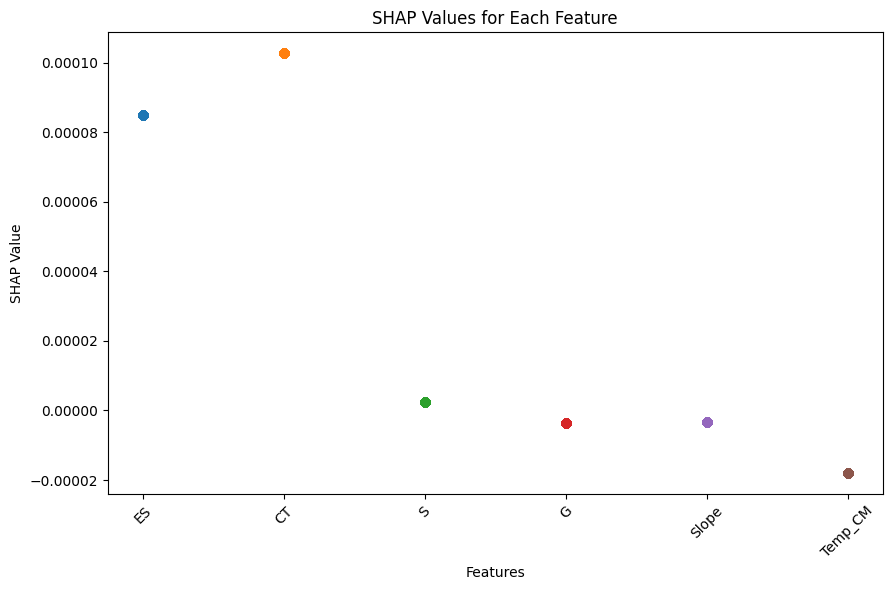

In [20]:
import matplotlib.pyplot as plt

feature = df_train.drop(columns=["Temp_Consump"]).columns

# Plot SHAP values
plt.figure(figsize=(10, 6))
for i in range(len(feature)):
    plt.scatter([feature[i]] * len(sd[:, i]), sd[:, i], alpha=0.5)

plt.xlabel("Features")
plt.ylabel("SHAP Value")
plt.title("SHAP Values for Each Feature")
plt.xticks(rotation=45)
plt.show()

In [25]:
###########
#Calculate MAPE
a = 0
for i in range(len(y_test)):
  if y_test[i] != 0:
    pe = (y_test[i] - y_pred[i]) / y_test[i]
    pe = abs(pe)
    a += pe

MAPE = a/len(y_test)
print("MAPE is:", MAPE)

MAPE is: 0.38615421601479344
